# Trabalho 2

## 4.1.7 b)

Neste notebook está o código relativo à DecisionTreeRegression.

### Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text

import utilidades as ut

### Inicializações e variáveis

In [2]:
warnings.filterwarnings("ignore")  # Desabilitar warnings.
plt.style.use(
    "style/estilo.mplstyle")  # Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
%matplotlib inline

label_encoder = LabelEncoder()

ficheiro = "dados_preparados.csv"
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
colunas_classes = ["Genero", "Historico_obesidade_familiar", "FCCAC", "Fumador", "MCC", "CCER", "CBA", "TRANS"]
colunas_classes_binarias = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
colunas_classes_multiplos = ["CCER", "CBA", "TRANS", "Label"]

## Leitura dos dados preparados

In [3]:
dados_trabalho = pd.read_csv(ficheiro)

In [4]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.000000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535


Remover o atributo *Label*.

In [5]:
dados_trabalho.drop("Label", axis=1, inplace=True)

Temos no entanto de realizar primeiro o encoding das classes para valores numéricos, esta operação é realizada usando o ``sklearn.preprocessing.LabelEncoder`` em todas as colunas com apenas 2 classes.

In [6]:
ut.titulo("Valores codificados por atributo")

for coluna in colunas_classes:
    if dados_trabalho[coluna].dtype == 'object':
        dados_trabalho[coluna] = label_encoder.fit_transform(dados_trabalho[coluna].values)
        ut.etiqueta_e_valor(coluna, str(sorted(dados_trabalho[coluna].unique())))

Valores codificados por atributo
Genero: [0, 1]
Historico_obesidade_familiar: [0, 1]
FCCAC: [0, 1]
Fumador: [0, 1]
MCC: [0, 1]
CCER: [0, 1, 2, 3]
CBA: [0, 1, 2, 3]
TRANS: [0, 1, 2, 3, 4]


In [7]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,IMC
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,4,24.386526
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,4,24.238227
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,0,4,23.765432
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,0,2,26.851852
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,4,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,4,44.901475
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,4,43.741923
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,4,43.543817
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,4,44.071535


| Target | Preditores                   |
|--------|------------------------------|
| IMC    | Todos os restantes stributos |

O target não muda, será sempre o IMC.

In [8]:
y = dados_trabalho.IMC

## Preditores

In [9]:
lista_preditores = list(dados_trabalho.columns)
lista_preditores.remove("IMC")
X = dados_trabalho[lista_preditores].to_numpy()

### Holdout

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Cálculo

In [11]:
arvore_decisao = DecisionTreeRegressor(
    random_state=42,
    max_depth=6,
    min_samples_split=3
)  # Restrição de alguns parâmetros da árvore
modelo_regressao = arvore_decisao.fit(X_train, y_train)

y_pred_treino = arvore_decisao.predict(X_train)
y_pred_teste = arvore_decisao.predict(X_test)

### Avaliação do Modelo

#### Métricas dos dados de teste e de treino

In [17]:
mae_treino = metrics.mean_absolute_error(y_train, y_pred_treino)
mae_teste = metrics.mean_absolute_error(y_test, y_pred_teste)
rmse_treino = np.sqrt(np.mean((y_train - y_pred_treino) ** 2))
rmse_teste = np.sqrt(np.mean((y_test - y_pred_teste) ** 2))

ut.titulo("Métricas nos dados de teste")
ut.etiqueta_e_valor("MAE", f"{mae_teste:.3f}")
ut.etiqueta_e_valor("RMSE", f"{rmse_treino:.3f}")

ut.titulo("Métricas nos dados de treino")
ut.etiqueta_e_valor("MAE", f"{mae_treino:.3f}")
ut.etiqueta_e_valor("RMSE", f"{rmse_treino:.3f}")

Métricas nos dados de teste
MAE: 2.911
RMSE: 3.496
Métricas nos dados de treino
MAE: 2.474
RMSE: 3.496


### Visualização da Regression Tree

[Text(0.48114224137931033, 0.9285714285714286, 'Historico_obesidade_familiar <= 0.5\nsquared_error = 64.147\nsamples = 1688\nvalue = 29.583'),
 Text(0.23814655172413793, 0.7857142857142857, 'Idade <= 20.986\nsquared_error = 17.449\nsamples = 315\nvalue = 21.44'),
 Text(0.1314655172413793, 0.6428571428571429, 'MCC <= 0.5\nsquared_error = 12.546\nsamples = 173\nvalue = 19.632'),
 Text(0.06896551724137931, 0.5, 'Genero <= 0.5\nsquared_error = 10.65\nsamples = 143\nvalue = 19.191'),
 Text(0.034482758620689655, 0.35714285714285715, 'CBA <= 1.5\nsquared_error = 5.802\nsamples = 100\nvalue = 18.342'),
 Text(0.017241379310344827, 0.21428571428571427, 'CA <= 1.5\nsquared_error = 6.076\nsamples = 17\nvalue = 21.095'),
 Text(0.008620689655172414, 0.07142857142857142, 'squared_error = 3.276\nsamples = 10\nvalue = 22.131'),
 Text(0.02586206896551724, 0.07142857142857142, 'squared_error = 6.354\nsamples = 7\nvalue = 19.615'),
 Text(0.05172413793103448, 0.21428571428571427, 'FAF <= 0.014\nsquared_err

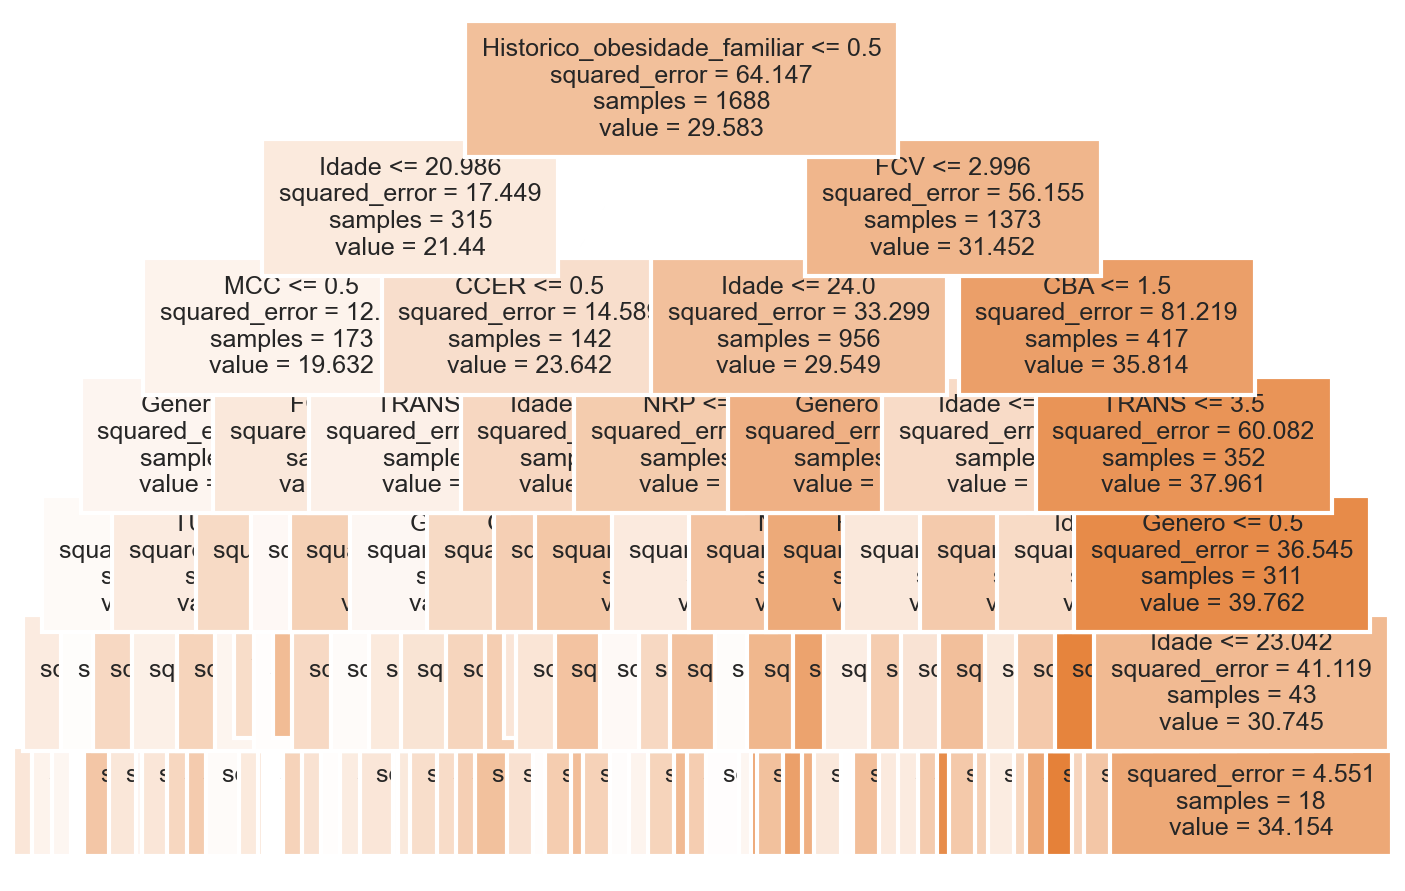

In [13]:
plot_tree(
    modelo_regressao,
    feature_names=list(dados_trabalho.columns),
    class_names=list(dados_trabalho['IMC']),
    filled=True,
    fontsize=6
)

### Modelo de regressão

In [14]:
print(export_text(modelo_regressao, show_weights=True))

|--- feature_2 <= 0.50
|   |--- feature_1 <= 20.99
|   |   |--- feature_9 <= 0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_12 <= 1.50
|   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |--- value: [22.13]
|   |   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |   |--- value: [19.62]
|   |   |   |   |--- feature_12 >  1.50
|   |   |   |   |   |--- feature_10 <= 0.01
|   |   |   |   |   |   |--- value: [19.00]
|   |   |   |   |   |--- feature_10 >  0.01
|   |   |   |   |   |   |--- value: [17.34]
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_11 <= 0.24
|   |   |   |   |   |--- feature_1 <= 18.50
|   |   |   |   |   |   |--- value: [28.28]
|   |   |   |   |   |--- feature_1 >  18.50
|   |   |   |   |   |   |--- value: [21.97]
|   |   |   |   |--- feature_11 >  0.24
|   |   |   |   |   |--- feature_1 <= 18.50
|   |   |   |   |   |   |--- value: [19.15]
|   |   |   |   |   |--- feature_1 >  18.50
|   |   |   |   |   |   |--- v